### Test case LVV-T29 - Verify implementation of Raw Science Image Data Acquisition

Verify acquisition of raw data from an LSST camera in all modes.

#### Discussion:

**Specification:** The DMS shall acquire raw Exposure data from the Camera science sensors during normal operations, calibration data collection, and in any other required engineering modes.

Here we demonstrate that this is being done routinely at the summit using Auxtel+LATISS data that was obtained recently, and is already in the Butler. We query the Butler to retrieve raw Auxtel+LATISS images for both calibration and science observations, and show that the images are well-formed.

Finally, we highlight the "obs" packages in the LSST Science Pipelines that provide camera models to enable the acquisition and ingestion of images from cameras.

In [1]:
import matplotlib.pyplot as plt

import lsst.afw.display as afwDisplay
from lsst.daf.butler import Butler

afwDisplay.setDefaultBackend('matplotlib')

In [2]:
# Initialize the butler repo pointing to the LATISS/raw/all collection
repo = '/repo/embargo_new'
collection = 'LATISS/raw/all'

butler = Butler(repo, collections=[collection])

Query the butler collection for biases, flats, and science images taken with LATISS on 07 August 2024 (20240807).

In [3]:
flats = butler.query_datasets('raw', where="day_obs=20240807 AND instrument='LATISS' AND\
                              band in ('g','r','i','z','y') AND exposure.observation_type='flat'")
bias = butler.query_datasets('raw', where="day_obs=20240807 AND instrument='LATISS' AND\
                             band in ('g','r','i','z','y') AND exposure.observation_type='bias'")
science = butler.query_datasets('raw', where="day_obs=20240807 AND instrument='LATISS' AND\
                                band in ('g','r','i','z','y') AND exposure.observation_type='science'")

In [4]:
# How many images of each type were taken?
print(len(flats), len(bias), len(science))

210 27 64


Examine an example image from each image type in detail to confirm that the DMS has successfully acquired camera Exposures in various observing modes.

### Examine a raw flat

Select the first flat from the query results.

In [5]:
flat0 = butler.get('raw', dataId=flats[0].dataId)

print(type(flat0))

<class 'lsst.afw.image._exposure.ExposureF'>


We see that this raw image has been ingested to the Butler as an `ExposureF` object.

Look at the metadata to confirm that necessary information has been populated. We will look at the following elements:
- metadata
- visitInfo
- WCS
- image

First, print the FITS metadata:

In [6]:
for item in flat0.metadata.items():
    print(item)

('SIMPLE', True)
('EXTEND', True)
('CCD_MANU', 'ITL')
('CCD_TYPE', '3800C')
('DETSIZE', '[1:4072,1:4000]')
('BINX', 1)
('BINY', 1)
('CCDGAIN', 1.0)
('CCDNOISE', 10.0)
('CCDSLOT', 'S00')
('RAFTBAY', 'R00')
('FIRMWARE', '11394008')
('PLATFORM', 'auxtel')
('CONTNUM', '189216ee')
('DAQVERS', 'R5-V8.1 2023-12-05T02:49:12Z (5acbb461)')
('DAQPART', 'lat')
('DAQFOLD', 'raw')
('SEQFILE', 'FP_ITL_2s_ir2_v26_no_RG.seq')
('SEQNAME', 'FP_ITL_2s_ir2_v26_no_RG.seq')
('SEQCKSUM', '1477162166')
('LSST_NUM', 'ITL-3800C-068')
('CCD_SERN', '20862')
('REBNAME', 'Unknown')
('RAFTNAME', 'AuxTel-Raft')
('FPVERS', '1.2.7')
('IHVERS', '1.1.5')
('STUTTER ROWS', 0)
('STUTTER DELAY', 0.0)
('STUTTER NSHIFTS', 0)
('FILTPOS', None)
('DATE', '2024-08-07T20:41:48.371')
('MJD', 60529.862365405075)
('IMGTYPE', 'FLAT')
('DATE-OBS', '2024-08-07T20:41:47.617')
('MJD-OBS', 60529.86235667812)
('DATE-TRG', '2024-08-07T20:41:48.366')
('MJD-TRG', 60529.86236534733)
('OBSID', 'AT_O_20240807_000011')
('DATE-BEG', '2024-08-07T20:41

The metadata contains information about the camera and CCD, the time and date of observation, telescope pointing, and environmental conditions, among other things. This is a fully-formed set of image metadata.

Now examine the `visitInfo`, which should tell us details about the observation.

In [7]:
print(type(flat0.visitInfo), '\n')
print(flat0.visitInfo)

<class 'lsst.afw.image.VisitInfo'> 

VisitInfo(exposureTime=0.52, darkTime=0.754293, date=2024-08-07T20:41:47.994494657, UT1=nan, ERA=4.65723 rad, boresightRaDec=(159.1224262382, -78.5759209415), boresightAzAlt=(188.7660603061, +38.9658480074), boresightAirmass=nan, boresightRotAngle=0.0521649 rad, rotType=0, observatory=-30.2448N, -70.7477E  2663.01, weather=Weather(-0.2, 73850, 29.65), instrumentLabel='LATISS', id=2024080700011, focusZ=0, observationType='flat', scienceProgram='BLOCK-271', observationReason='block-271_3', object='FlatField position', hasSimulatedContent=false)


As expected, this contains information about the observations that has been compiled from the metadata. It is stored in an `lsst.afw.image.VisitInfo` object.

Now check the WCS associated with the flat.

In [8]:
print(type(flat0.wcs),'\n')
print(flat0.wcs)

<class 'lsst.afw.geom.SkyWcs'> 

FITS standard SkyWcs:
Sky Origin: (159.1224262382, -78.5759209415)
Pixel Origin: (2088, 2006)
Pixel Scale: 0.095695 arcsec/pixel


We have thus confirmed that this is a well-formed WCS. Note that the "Sky Origin" of the WCS is the same as the "boresightRaDec" from the visitInfo.

Finally, display the image of the raw flat to confirm that it is well-formed:

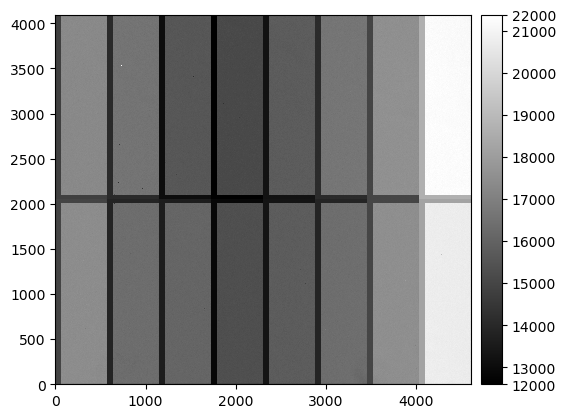

In [9]:
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale('linear', 'zscale')
display.mtv(flat0.image)
plt.show()

The image looks as expected, with 16 amplifiers clearly visible via the variations in their flux levels.

We have confirmed the acquisition and subsequent ingestion of a raw flat-field image.

### Examine a raw bias

Select the first bias from the query results, and repeat the steps to examine its contents.

In [10]:
bias0 = butler.get('raw', dataId=bias[0].dataId)

In [11]:
for item in bias0.metadata.items():
    print(item)

('SIMPLE', True)
('EXTEND', True)
('CCD_MANU', 'ITL')
('CCD_TYPE', '3800C')
('DETSIZE', '[1:4072,1:4000]')
('BINX', 1)
('BINY', 1)
('CCDGAIN', 1.0)
('CCDNOISE', 10.0)
('CCDSLOT', 'S00')
('RAFTBAY', 'R00')
('FIRMWARE', '11394008')
('PLATFORM', 'auxtel')
('CONTNUM', '189216ee')
('DAQVERS', 'R5-V8.1 2023-12-05T02:49:12Z (5acbb461)')
('DAQPART', 'lat')
('DAQFOLD', 'raw')
('SEQFILE', 'FP_ITL_2s_ir2_v26_no_RG.seq')
('SEQNAME', 'FP_ITL_2s_ir2_v26_no_RG.seq')
('SEQCKSUM', '1477162166')
('LSST_NUM', 'ITL-3800C-068')
('CCD_SERN', '20862')
('REBNAME', 'Unknown')
('RAFTNAME', 'AuxTel-Raft')
('FPVERS', '1.2.7')
('IHVERS', '1.1.5')
('STUTTER ROWS', 0)
('STUTTER DELAY', 0.0)
('STUTTER NSHIFTS', 0)
('FILTPOS', None)
('DATE', '2024-08-07T21:18:01.517')
('MJD', 60529.887517557945)
('IMGTYPE', 'BIAS')
('DATE-OBS', '2024-08-07T21:18:01.506')
('MJD-OBS', 60529.887517430354)
('DATE-TRG', '2024-08-07T21:18:01.512')
('MJD-TRG', 60529.8875175002)
('OBSID', 'AT_O_20240807_000077')
('DATE-BEG', '2024-08-07T21:18

In [12]:
print(type(bias0.visitInfo), '\n')
print(bias0.visitInfo)

<class 'lsst.afw.image.VisitInfo'> 

VisitInfo(exposureTime=0, darkTime=0.0110199, date=2024-08-07T21:18:01.511991289, UT1=nan, ERA=4.81573 rad, boresightRaDec=(168.0983499901, -78.5697723886), boresightAzAlt=(188.7657027682, +38.9647225000), boresightAirmass=nan, boresightRotAngle=0.054012 rad, rotType=0, observatory=-30.2448N, -70.7477E  2663.01, weather=Weather(0.05, 73880, 27.85), instrumentLabel='LATISS', id=2024080700077, focusZ=0, observationType='bias', scienceProgram='BLOCK-295', observationReason='bias', object='FlatField position', hasSimulatedContent=false)


In [13]:
print(type(bias0.wcs),'\n')
print(bias0.wcs)

<class 'lsst.afw.geom.SkyWcs'> 

FITS standard SkyWcs:
Sky Origin: (168.0983499901, -78.5697723886)
Pixel Origin: (2088, 2006)
Pixel Scale: 0.095695 arcsec/pixel


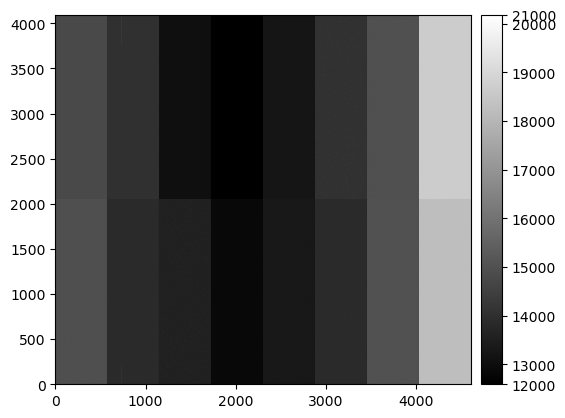

In [14]:
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale('linear', 'zscale')
display.mtv(bias0.image)
plt.show()

The raw bias image and its metadata look well-formed. We have confirmed the acquisition and subsequent ingestion of a raw bias image.

### Examine a raw science image

Select the first science frame from the query results, and repeat the steps to examine its contents.

In [15]:
sci0 = butler.get('raw', dataId=science[0].dataId)

In [16]:
for item in sci0.metadata.items():
    print(item)

('SIMPLE', True)
('EXTEND', True)
('CCD_MANU', 'ITL')
('CCD_TYPE', '3800C')
('DETSIZE', '[1:4072,1:4000]')
('BINX', 1)
('BINY', 1)
('CCDGAIN', 1.0)
('CCDNOISE', 10.0)
('CCDSLOT', 'S00')
('RAFTBAY', 'R00')
('FIRMWARE', '11394008')
('PLATFORM', 'auxtel')
('CONTNUM', '189216ee')
('DAQVERS', 'R5-V8.1 2023-12-05T02:49:12Z (5acbb461)')
('DAQPART', 'lat')
('DAQFOLD', 'raw')
('SEQFILE', 'FP_ITL_2s_ir2_v26_no_RG.seq')
('SEQNAME', 'FP_ITL_2s_ir2_v26_no_RG.seq')
('SEQCKSUM', '1477162166')
('LSST_NUM', 'ITL-3800C-068')
('CCD_SERN', '20862')
('REBNAME', 'Unknown')
('RAFTNAME', 'AuxTel-Raft')
('FPVERS', '1.2.7')
('IHVERS', '1.1.5')
('STUTTER ROWS', 0)
('STUTTER DELAY', 0.0)
('STUTTER NSHIFTS', 0)
('FILTPOS', None)
('DATE', '2024-08-08T02:04:51.846')
('MJD', 60530.0867111804)
('IMGTYPE', 'OBJECT')
('DATE-OBS', '2024-08-08T02:04:21.617')
('MJD-OBS', 60530.08636130765)
('DATE-TRG', '2024-08-08T02:04:51.843')
('MJD-TRG', 60530.08671114594)
('OBSID', 'AT_O_20240807_000463')
('DATE-BEG', '2024-08-08T02:04

In [17]:
print(type(sci0.visitInfo), '\n')
print(sci0.visitInfo)

<class 'lsst.afw.image.VisitInfo'> 

VisitInfo(exposureTime=30, darkTime=30.2299, date=2024-08-08T02:04:36.731990515, UT1=nan, ERA=6.06962 rad, boresightRaDec=(270.1877205421, -25.0189907779), boresightAzAlt=(309.8050078405, +82.1059562590), boresightAirmass=1.00936, boresightRotAngle=6.28318 rad, rotType=1, observatory=-30.2448N, -70.7477E  2663.01, weather=Weather(-1.65, 73940, 10.475), instrumentLabel='LATISS', id=2024080700463, focusZ=0.0371497, observationType='science', scienceProgram='AUXTEL_PHOTO_IMAGING', observationReason='imaging', object='Photo1800-1_012', hasSimulatedContent=false)


In [18]:
print(type(sci0.wcs),'\n')
print(sci0.wcs)

<class 'lsst.afw.geom.SkyWcs'> 

FITS standard SkyWcs:
Sky Origin: (270.1877205421, -25.0189907779)
Pixel Origin: (2088, 2006)
Pixel Scale: 0.095695 arcsec/pixel


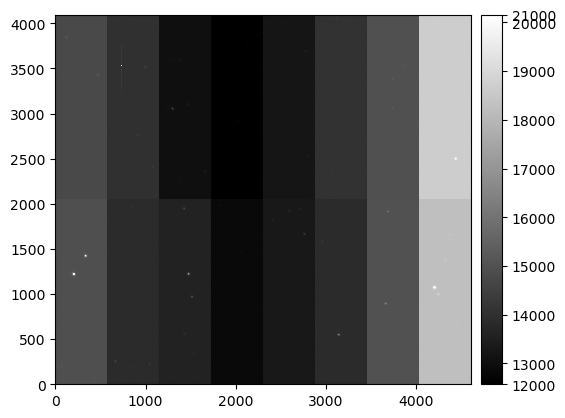

In [19]:
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale('linear', 'zscale')
display.mtv(sci0.image)
plt.show()

The raw science image and its metadata look well-formed, with some astronomical sources visible. We have confirmed the acquisition and subsequent ingestion of a raw science image.

### Camera "obs packages"

Finally, we highlight the "obs packages" that define each camera model and configure the LSST Science Pipelines to read and ingest raw data from a telescope and instrument using the gen3 middleware. These are built on the `lsst.obs.base` framework, and define and associate things like the camera geometry, filters and their mappings, translations of FITS metadata to LSST-specific quantities and structures (e.g., the `visitInfo` seen above), and camera-specific configurations for pipelines tasks.

In particular, we look at `obs_lsst`, which contains LSST-specific camera info.

In [20]:
import lsst.obs.lsst as obs_lsst

In [21]:
dir(obs_lsst)

['COMCAM_FILTER_DEFINITIONS',
 'GENERIC_FILTER_DEFINITIONS',
 'LATISS_FILTER_DEFINITIONS',
 'LSSTCAM_FILTER_DEFINITIONS',
 'LSSTCAM_IMSIM_FILTER_DEFINITIONS',
 'Latiss',
 'LsstCam',
 'LsstCamImSim',
 'LsstCamPhoSim',
 'LsstCamSim',
 'LsstComCam',
 'LsstComCamSim',
 'LsstTS3',
 'LsstTS8',
 'LsstUCDCam',
 'PhotodiodeIngestConfig',
 'PhotodiodeIngestTask',
 'RubinDimensionPacker',
 'TS3_FILTER_DEFINITIONS',
 'TS8_FILTER_DEFINITIONS',
 'UCD_FILTER_DEFINITIONS',
 '__builtins__',
 '__cached__',
 '__dependency_versions__',
 '__doc__',
 '__file__',
 '__fingerprint__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__repo_version__',
 '__spec__',
 '__version__',
 '_fitsHeader',
 '_ingestPhotodiode',
 '_instrument',
 '_packer',
 'assembly',
 'filters',
 'rawFormatter',
 'readRawFitsHeader',
 'translators',
 'version']

We see filter definitions for all LSST cameras (e.g., LATISS, ComCam, LSSTCam), and specific classes for each of these cameras, in addition to utilities such as image `assembly` and metadata `translators`.

Examining the `translators`, we see that there are specific translators for each camera:

In [22]:
dir(obs_lsst.translators)

['LatissTranslator',
 'LsstCamImSimTranslator',
 'LsstCamPhoSimTranslator',
 'LsstCamSimTranslator',
 'LsstCamTranslator',
 'LsstComCamSimTranslator',
 'LsstComCamTranslator',
 'LsstTS3Translator',
 'LsstTS8Translator',
 'LsstUCDCamTranslator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'comCam',
 'comCamSim',
 'imsim',
 'latiss',
 'lsst',
 'lsstCam',
 'lsstCamSim',
 'lsst_ucdcam',
 'lsstsim',
 'phosim',
 'ts3',
 'ts8']

Look at one of the filter definitions (in this case, for LATISS). The main purpose of this is to create the mapping between "physical filter" and "band", so we examine that translation dictionary.

In [23]:
filt = obs_lsst.LATISS_FILTER_DEFINITIONS

In [24]:
filt.physical_to_band

{'empty': 'white',
 'blank_bk7_wg05': 'white',
 'KPNO_1111_436nm': 'g',
 'KPNO_373A_677nm': 'r',
 'KPNO_406_828nm': 'z',
 'diffuser': 'diffuser',
 'unknown': 'unknown',
 'BG40': 'g',
 'BG40_65mm_1': 'g',
 'BG40_65mm_2': 'g',
 'quadnotch1': 'notch',
 'RG610': 'r',
 'OG550_65mm_1': 'g',
 'OG550_65mm_2': 'g',
 'FELH0600': 'r',
 'SDSSg': 'g',
 'SDSSr': 'r',
 'SDSSi': 'i',
 'collimator': 'white',
 'cyl_lens': 'white',
 'SDSSu_65mm': 'u',
 'SDSSg_65mm': 'g',
 'SDSSr_65mm': 'r',
 'SDSSi_65mm': 'i',
 'SDSSz_65mm': 'z',
 'SDSSy_65mm': 'y',
 'empty~ronchi90lpmm': 'white',
 'empty~ronchi170lpmm': 'white',
 'empty~empty': 'white',
 'empty~unknown': 'white',
 'empty~holo4_003': 'white',
 'empty~blue300lpmm_qn1': 'white',
 'empty~holo4_001': 'white',
 'empty~pinhole_1_1000': 'white',
 'empty~pinhole_1_0500': 'white',
 'empty~pinhole_1_0200': 'white',
 'empty~pinhole_1_0100': 'white',
 'empty~pinhole_2_1_1000': 'white',
 'empty~pinhole_2_1_0500': 'white',
 'empty~pinhole_2_1_0200': 'white',
 'empty~p

Now examine one of the camera modules in more detail. Select LATISS, and show the associated properties and methods.

In [25]:
dir(obs_lsst.Latiss)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_from_cls_name',
 '_getSpecificCuratedCalibrationPath',
 '_make_default_dimension_packer',
 '_make_default_dimension_packer_dispatch',
 '_registerFilters',
 '_writeSpecificCuratedCalibrationDatasets',
 'additionalCuratedDatasetTypes',
 'applyConfigOverrides',
 'configPaths',
 'extractDetectorRecord',
 'filterDefinitions',
 'formatCollectionTimestamp',
 'fromName',
 'from_data_id',
 'from_string',
 'getCamera',
 'getCuratedCalibrationNames',
 'getName',
 'getObsDataPackageDir',
 'getRawFormatter',
 'group_name_to_group_id',
 'importAll',
 'instrume

As an example, use the `getCamera` method to examine the LATISS `Camera` object.

In [26]:
cam_latiss = obs_lsst.Latiss.getCamera()
print(cam_latiss)

In [27]:
dir(cam_latiss)

['Builder',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'computeMaxFocalPlaneRadius',
 'dtype',
 'findDetectors',
 'findDetectorsList',
 'get',
 'getFpBBox',
 'getIdIter',
 'getIdMap',
 'getName',
 'getNameIter',
 'getNameMap',
 'getPupilFactory',
 'getPupilFactoryName',
 'getTransform',
 'getTransformMap',
 'isPersistable',
 'readFits',
 'rebuild',
 'telescopeDiameter',
 'transform',
 'writeFits']

We see that this `Camera` model defines FITS read/write methods, information about the telescope and the camera geometry, and transformation info for the headers, among other properties.

### Results

We have demonstrated the acquisition of raw camera exposures from LATISS and their translation into LSST Science Pipelines `ExposureF` objects. Examination of biases, flats, and science frames illustrates the acquisition of images from various observing modes. Finally, we have illustrated the camera "obs" packages that define how the raw image from the camera is assembled and interpreted by the DMS. The result of this test is a **"Pass"**.